# step 1

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import optimize

In [2]:
T = 117 # Trading days a year --> as a month?

# step 2

In [3]:
price_df = pd.read_excel('stock_daily_data.xlsx')
columns_to_read = [0] + list(range(1, 102, 5)) 
data = price_df.iloc[:, columns_to_read]
data.set_index('Date', inplace=True)
data

,Stock 29_close,Stock 15_close,Stock 97_close,Stock 17_close,Stock 32_close,Stock 51_close,Stock 81_close,Stock 79_close,Stock 70_close,Stock 16_close,...,Stock 2_close,Stock 43_close,Stock 93_close,Stock 91_close,Stock 85_close,Stock 84_close,Stock 88_close,Stock 82_close,Stock 87_close,Stock 74_close
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-02,205.427141,138.974844,48.161371,132.608993,90.316023,207.293825,7.080739,3.956296,896.022788,752.710697,...,721.653324,586.251657,9.992023,15.302430,18.324932,7.628326,11.672289,87.225253,3.298722,75.547500
2024-02-05,196.073191,132.748771,46.287272,122.670126,90.464569,208.793238,6.376867,3.747337,862.505726,751.429850,...,741.294707,572.489042,10.269580,15.545677,18.495214,7.330635,10.959895,89.840597,3.168510,76.377692
2024-02-06,208.125396,145.200917,49.856985,127.979931,99.451607,239.281299,6.660517,4.012018,922.389544,794.551677,...,774.371219,611.453329,10.315839,15.589904,19.385918,7.764768,11.220193,88.921692,3.396382,77.104111
2024-02-07,209.204698,152.316429,51.731084,136.012714,105.616270,255.649890,6.986189,4.248839,934.008792,806.506243,...,791.649994,610.738388,10.061412,15.213977,20.407608,7.863998,11.425691,90.924433,3.504893,79.594688
2024-02-08,218.558648,153.761767,53.396949,141.186371,104.650720,250.651847,7.469444,4.276700,971.994795,810.348782,...,775.781732,629.148120,9.968894,15.037070,19.831270,7.938421,11.425691,89.699227,3.624254,77.000337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,185.183648,107.272279,51.925703,111.113664,92.798033,200.183483,7.690061,3.733406,784.194138,707.729916,...,666.799456,715.501246,11.254228,17.308404,20.551524,9.403782,11.719954,101.202925,3.369708,92.482271
2024-07-29,188.619673,106.266601,50.915356,110.566979,90.821990,197.274942,7.669049,3.747337,776.995569,695.130673,...,649.214247,682.352707,11.521607,17.634978,21.345071,9.403782,11.890220,101.302144,3.347318,93.134320
2024-07-30,188.077142,107.495763,50.547957,112.480376,90.745988,196.769109,7.879160,3.761267,779.245122,679.490232,...,643.100780,671.484334,11.594529,17.658305,20.605324,9.607107,11.932786,98.722462,3.369708,90.960824


In [4]:
returns = data.pct_change()
returns=returns.dropna(thresh=len(data)-1,axis=1).dropna()
returns

,Stock 29_close,Stock 15_close,Stock 97_close,Stock 17_close,Stock 32_close,Stock 51_close,Stock 81_close,Stock 79_close,Stock 70_close,Stock 16_close,...,Stock 2_close,Stock 43_close,Stock 93_close,Stock 91_close,Stock 85_close,Stock 84_close,Stock 88_close,Stock 82_close,Stock 87_close,Stock 74_close
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-05,-0.045534,-0.044800,-0.038913,-0.074949,0.001645,0.007233,-0.099407,-0.052817,-0.037406,-0.001702,...,0.027217,-0.023476,0.027778,0.015896,0.009292,-0.039024,-0.061033,0.029984,-0.039474,0.010989
2024-02-06,0.061468,0.093802,0.077121,0.043285,0.099343,0.146020,0.044481,0.070632,0.069430,0.057386,...,0.044620,0.068061,0.004505,0.002845,0.048159,0.059222,0.023750,-0.010228,0.071918,0.009511
2024-02-07,0.005186,0.049005,0.037589,0.062766,0.061987,0.068407,0.048896,0.059028,0.012597,0.015046,...,0.022313,-0.001169,-0.024664,-0.024113,0.052703,0.012780,0.018315,0.022523,0.031949,0.032301
2024-02-08,0.044712,0.009489,0.032202,0.038038,-0.009142,-0.019550,0.069173,0.006557,0.040670,0.004764,...,-0.020045,0.030143,-0.009195,-0.011628,-0.028241,0.009464,0.000000,-0.013475,0.034056,-0.032595
2024-02-19,0.031276,-0.016631,-0.008357,0.013500,-0.014904,-0.005484,0.015471,-0.013029,0.023908,0.005269,...,0.006045,-0.001420,0.046404,0.035294,0.038970,0.017188,0.022782,0.045705,-0.014970,0.017520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,-0.004859,0.018028,0.013142,0.022642,0.008258,0.012148,0.022346,0.011321,0.000000,-0.004887,...,0.004170,0.027308,-0.021142,-0.023684,0.010582,0.005435,-0.002415,-0.010909,0.006689,-0.010465
2024-07-29,0.018555,-0.009375,-0.019458,-0.004920,-0.021294,-0.014529,-0.002732,0.003731,-0.009180,-0.017802,...,-0.026373,-0.046329,0.023758,0.018868,0.038613,0.000000,0.014528,0.000980,-0.006645,0.007051
2024-07-30,-0.002876,0.011567,-0.007216,0.017305,-0.000837,-0.002564,0.027397,0.003717,0.002895,-0.022500,...,-0.009417,-0.015928,0.006329,0.001323,-0.034657,0.021622,0.003580,-0.025465,0.006689,-0.023337


# step 3
## optimization


In [5]:
mean_returns = returns.mean()*T
cov_matrix = returns.cov()*T

In [6]:
def portfolio_risk(weights,cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def objective_function(weights):
    return portfolio_risk(weights,cov_matrix)

In [7]:
# Define the portfolio return function

def portfolio_return(weights, mean_returns):
    return np.sum(weights*mean_returns)

def get_portfolio_return(weights, mean_returns):
    return np.sum(weights * mean_returns)

# Constraint that ensures the sum of weights is 1
def constraint_sum_to_1(w):
    return np.sum(w) - 1

# Constraint that ensures the portfolio return equals the target return
def constraint_return_eq_target_return(w, target_return):
    return get_portfolio_return(w, mean_returns) - target_return

# Define constraints, ensuring each one is a separate dictionary
return_target = 0.1
constraints = [
    {'type': 'eq', 'fun': constraint_sum_to_1},  # Sum of weights = 1
    {'type': 'eq', 'fun': lambda w: constraint_return_eq_target_return(w, return_target)}  # Portfolio return = target return
]

bounds = tuple((0, 1) for _ in range(len(mean_returns)))

initial_guess = [1./len(mean_returns)] * len(mean_returns)

In [8]:
result = optimize.minimize(
    objective_function,
    initial_guess,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

In [9]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.07109768099666378
       x: [ 1.578e-17  0.000e+00 ...  4.077e-02  3.962e-02]
     nit: 10
     jac: [ 1.066e-01  5.498e-02 ...  6.712e-02  7.911e-02]
    nfev: 221
    njev: 10

In [10]:
target_returns = np.linspace(min(mean_returns), max(mean_returns), 100)
efficient_frontier_volatility=[]
for target_return in target_returns:
    def constraint_return_eq_target_return(w, target_return):
        return portfolio_return(w, mean_returns) - target_return
    
    constraints = [
    {'type': 'eq', 'fun': constraint_sum_to_1},  # Sum of weights = 1
    {'type': 'eq', 'fun': lambda w: constraint_return_eq_target_return(w, target_return)},  # Portfolio return = target return
    ]
    
    # Perform the optimization
    result = optimize.minimize(
        objective_function,
        initial_guess,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    efficient_frontier_volatility.append(result.fun)

In [11]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.21343855607000708
       x: [ 4.606e-15  0.000e+00 ...  1.291e-15  4.580e-16]
     nit: 2
     jac: [ 1.115e-01  7.629e-02 ...  7.867e-02  5.180e-02]
    nfev: 53
    njev: 2

# step 4 plot


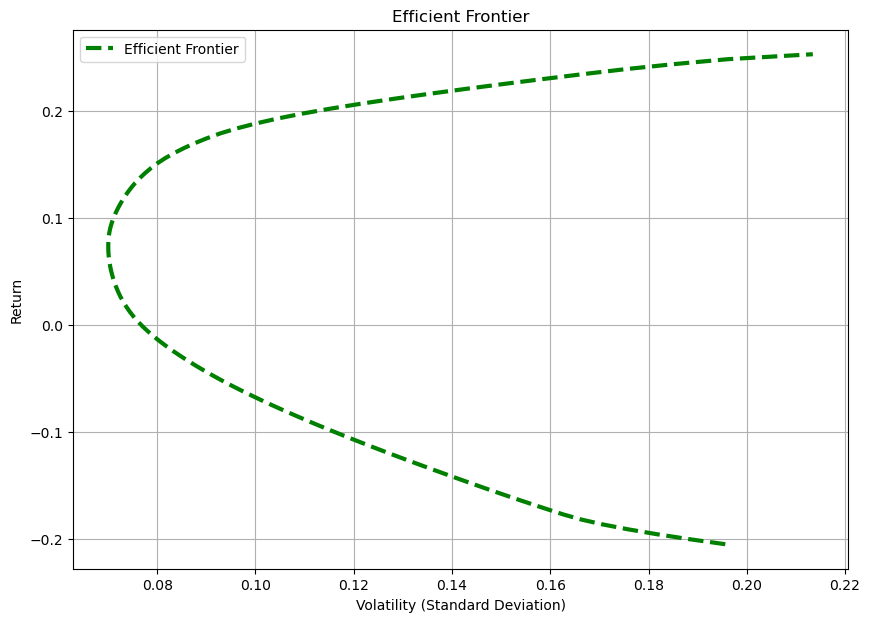

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(efficient_frontier_volatility, target_returns[:len(efficient_frontier_volatility)], 'g--', linewidth=3, label='Efficient Frontier')
#plt.scatter(optimal_risk,optimal_return)
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

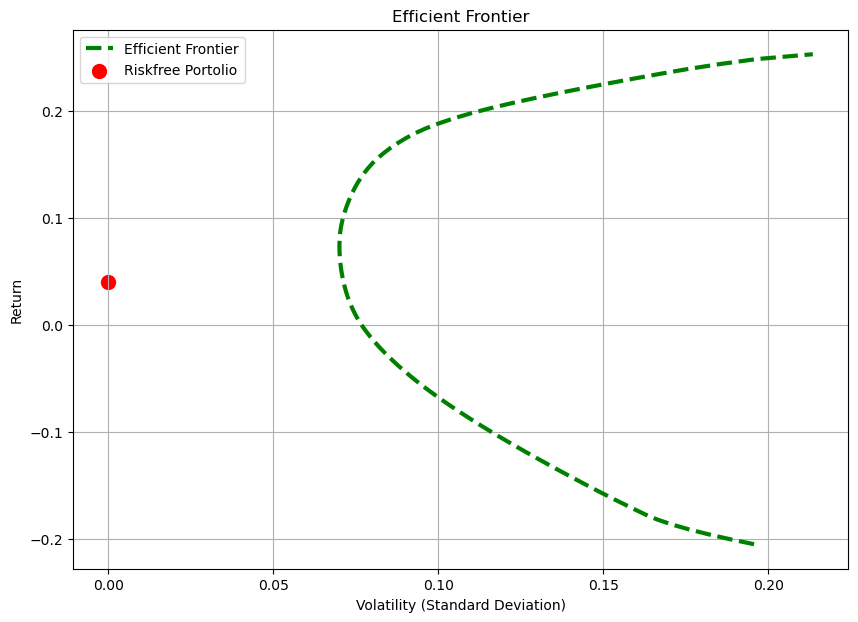

In [13]:
risk_free_rate =  0.04  # Annual risk-free rate

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(efficient_frontier_volatility, target_returns[:len(efficient_frontier_volatility)], 'g--', linewidth=3, label='Efficient Frontier')
#plt.scatter(optimal_risk,optimal_return)
plt.scatter(0, risk_free_rate, color='red', s=100, marker='o', label='Riskfree Portolio')

plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Define the function to minimize (negative Sharpe ratio)

def neg_sharpe_ratio(weights, risk_free_rate):
    portfolio_ann_return = portfolio_return(weights,mean_returns)
    portfolio_ann_volatility = portfolio_risk(weights,cov_matrix)
    sharpe_ratio = (portfolio_ann_return - risk_free_rate) / portfolio_ann_volatility
    return -sharpe_ratio  # Minimize the negative Sharpe ratio


  
constraints = [
    {'type': 'eq', 'fun': constraint_sum_to_1},  # Sum of weights = 1
   # {'type': 'eq', 'fun': lambda w: constraint_return_eq_target_return(w, return_target)}  # Portfolio return = target return
]


result = optimize.minimize(fun=neg_sharpe_ratio,x0=initial_guess,args=(risk_free_rate,),constraints=constraints,bounds=bounds)

optimal_weights = result.x
market_portfolio_return = get_portfolio_return(optimal_weights, mean_returns)
market_portfolio_volatility = portfolio_risk(optimal_weights,cov_matrix)
max_sharpe_ratio = -result.fun  # Since we minimized the negative Sharpe ratio

In [15]:
market_portfolio_return, market_portfolio_volatility

(0.1796593474178701, 0.09310322381411407)

In [16]:
optimal_weights

array([1.48849320e-15, 1.69317355e-15, 2.08130253e-16, 6.68746298e-16,
       1.92388694e-16, 1.66377522e-16, 5.22655734e-02, 2.27898440e-16,
       1.34043921e-15, 3.06763555e-16, 5.04017252e-16, 8.54992910e-16,
       1.14968628e-01, 3.09125758e-01, 1.49568849e-01, 3.12737688e-02,
       1.79874224e-01, 5.33832821e-16, 5.58117974e-02, 1.65291385e-16,
       1.07111400e-01])

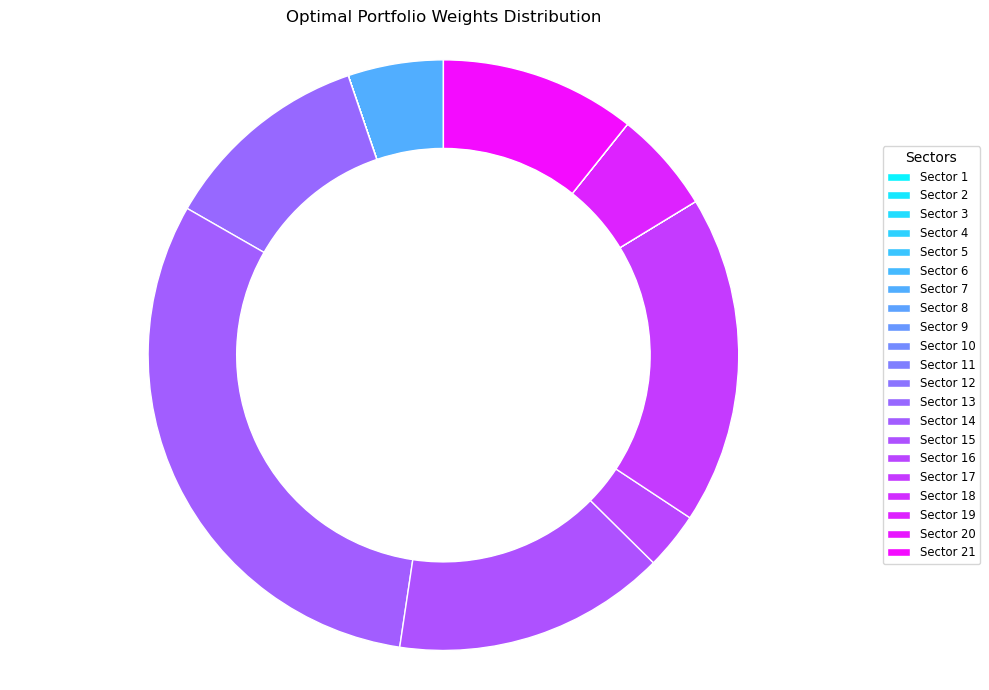

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Labels for the sectors
labels = [f'Sector {i+1}' for i in range(len(optimal_weights))]

# Create a color palette
colors = sns.color_palette("cool", len(optimal_weights))

# Creating a pie chart
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(optimal_weights, autopct='%1.1f%%', startangle=90, colors=colors,
                                  wedgeprops=dict(width=0.3, edgecolor='w'))

# Style the text and auto-text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

# Draw a circle at the center to turn the pie chart into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.title('Optimal Portfolio Weights Distribution')

# Add a legend outside the pie chart
plt.legend(wedges, labels, title="Sectors", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize='small')

# Display the chart
plt.tight_layout()
plt.show()



In [18]:
cml_volatility = np.linspace(0, market_portfolio_volatility*2, 100)
cml_returns = risk_free_rate + (market_portfolio_return - risk_free_rate) * (cml_volatility / market_portfolio_volatility)

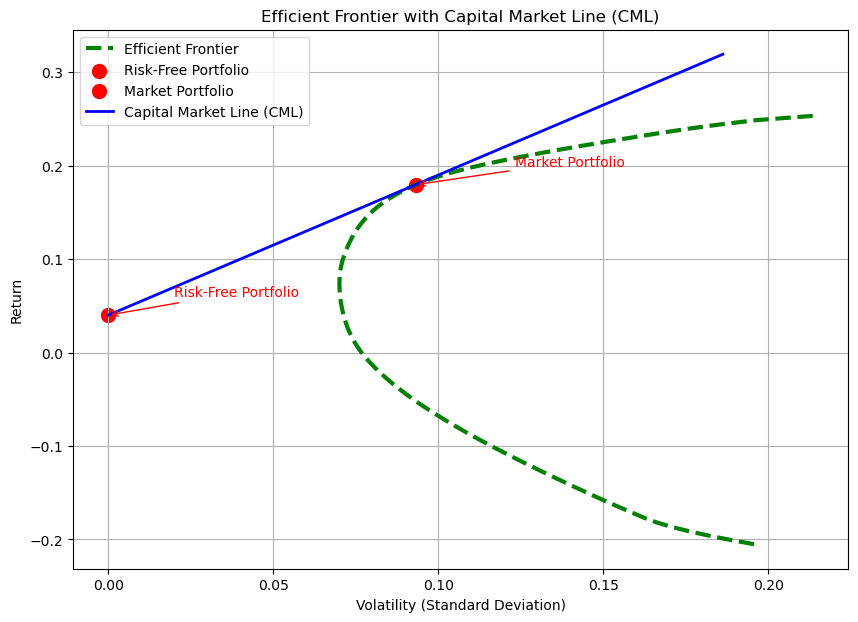

In [19]:
# Create the plot
plt.figure(figsize=(10, 7))

# Plot Efficient Frontier
plt.plot(efficient_frontier_volatility, target_returns[:len(efficient_frontier_volatility)], 'g--', linewidth=3, label='Efficient Frontier')

# Mark and label Risk-Free Portfolio
plt.scatter(0, risk_free_rate, color='red', s=100, marker='o', label='Risk-Free Portfolio')
plt.annotate('Risk-Free Portfolio', 
             xy=(0, risk_free_rate), 
             xytext=(0.02, risk_free_rate + 0.02),
             arrowprops=dict(arrowstyle="->", color='red'), 
             color='red')

# Mark and label Market Portfolio
plt.scatter(market_portfolio_volatility, market_portfolio_return, color='red', s=100, marker='o', label='Market Portfolio')
plt.annotate('Market Portfolio', 
             xy=(market_portfolio_volatility, market_portfolio_return), 
             xytext=(market_portfolio_volatility + 0.03, market_portfolio_return + 0.02),
             arrowprops=dict(arrowstyle="->", color='red'), 
             color='red')

# Plot Capital Market Line (CML)
plt.plot(cml_volatility, cml_returns, 'b-', linewidth=2, label='Capital Market Line (CML)')

# Add title and labels
plt.title('Efficient Frontier with Capital Market Line (CML)')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

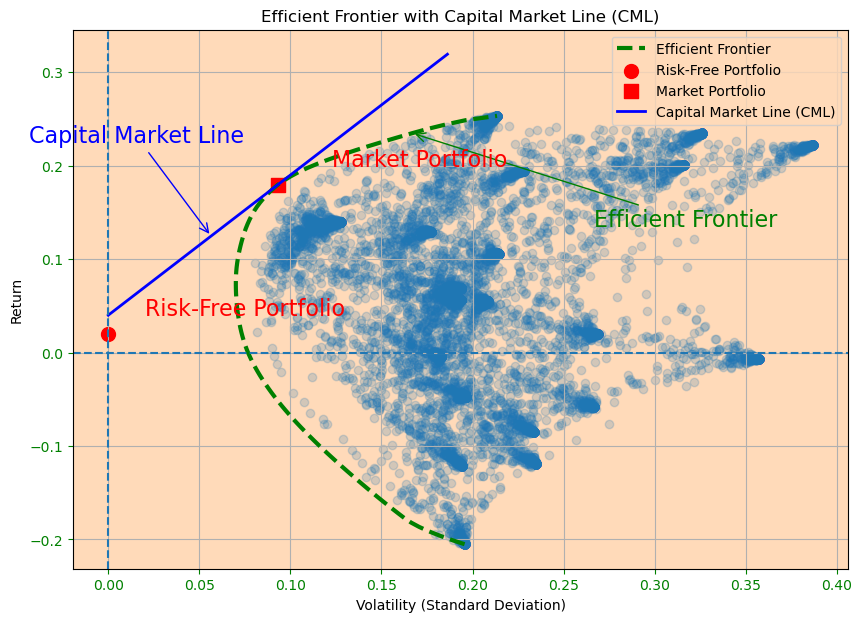

In [20]:
eff_idx=95
cml_idx=30

def generate_random_portfolios(num_assets, num_portfolios=1000):
    # Generate random portfolios
    portfolios = []
    for _ in range(num_portfolios):
        # Generate random weights
        weights = np.random.random(num_assets)
        # Normalize weights to sum to 1
        weights /= np.sum(weights)
        portfolios.append(weights)
    return np.array(portfolios)
import numpy as np

def generate_random_portfolios(num_assets, num_portfolios=10000, dispersion=0.01):
    # Use the Dirichlet distribution to generate weights with specified dispersion
    portfolios = np.random.dirichlet([dispersion] * num_assets, num_portfolios)
    return portfolios

# Example usage
num_assets = len(mean_returns)  # Replace with the actual number of assets
portfolios = generate_random_portfolios(num_assets)
#print(portfolios[0:2])  # Show the first few portfolios
random_vols = np.sqrt(np.einsum('ij,jk,ik->i', portfolios, cov_matrix, portfolios))
random_returns = np.dot(portfolios,mean_returns)
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'peachpuff'
risk_free_rate = 0.02  # Annual risk-free rate

# Create the plot
plt.figure(figsize=(10, 7))

# Plot Efficient Frontier
plt.plot(efficient_frontier_volatility, target_returns[:len(efficient_frontier_volatility)], 'g--', linewidth=3, label='Efficient Frontier')
plt.scatter(random_vols,random_returns,alpha=0.2)

# Annotate the Efficient Frontier with an arrow pointing to a specific point
plt.annotate('Efficient Frontier', 
             xy=(efficient_frontier_volatility[eff_idx], target_returns[eff_idx]), 
             xytext=(efficient_frontier_volatility[eff_idx] + 0.1, target_returns[eff_idx] - 0.1),
             arrowprops=dict(arrowstyle="->", color='green'), 
             color='green',fontsize=16)

plt.annotate('Capital Market Line', 
             xy=(cml_volatility[cml_idx], cml_returns[cml_idx]), 
             xytext=(cml_volatility[cml_idx] - 0.1, cml_returns[cml_idx] + 0.1),
             arrowprops=dict(arrowstyle="->", color='blue'), 
             color='blue',fontsize=16)

# Mark and label Risk-Free Portfolio
plt.scatter(0, risk_free_rate, color='red', s=100, marker='o', label='Risk-Free Portfolio')
plt.annotate('Risk-Free Portfolio', 
             xy=(0, risk_free_rate), 
             xytext=(0.02, risk_free_rate + 0.02),
             #arrowprops=dict(arrowstyle="->", color='red'), 
             color='red',fontsize=16)

# Mark and label Market Portfolio
plt.scatter(market_portfolio_volatility, market_portfolio_return, color='red', s=100, marker='s', label='Market Portfolio')
plt.annotate('Market Portfolio', 
             xy=(market_portfolio_volatility, market_portfolio_return), 
             xytext=(market_portfolio_volatility + 0.03, market_portfolio_return + 0.02),
             #arrowprops=dict(arrowstyle="->", color='red'), 
             color='red',fontsize=16)

plt.tick_params(color='green', labelcolor='green')
#plt.scatter(random_vols,random_returns)
# Plot Capital Market Line (CML)
plt.plot(cml_volatility, cml_returns, 'b-', linewidth=2, label='Capital Market Line (CML)')

plt.axhline(y=0,ls='--')
plt.axvline(x=0,ls='--')

# Add title and labels
plt.title('Efficient Frontier with Capital Market Line (CML)')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

# step 5
## daily adjustment

In [21]:
optimal_weights

array([1.48849320e-15, 1.69317355e-15, 2.08130253e-16, 6.68746298e-16,
       1.92388694e-16, 1.66377522e-16, 5.22655734e-02, 2.27898440e-16,
       1.34043921e-15, 3.06763555e-16, 5.04017252e-16, 8.54992910e-16,
       1.14968628e-01, 3.09125758e-01, 1.49568849e-01, 3.12737688e-02,
       1.79874224e-01, 5.33832821e-16, 5.58117974e-02, 1.65291385e-16,
       1.07111400e-01])

In [22]:
import numpy as np
import pandas as pd


total_cash = 100000000
investment_amount = total_cash * 0.9
cash_reserve = total_cash - investment_amount

transaction_fee_rate = 0.001

portfolio_df = pd.DataFrame(columns=['Date'] + [f'Stock_{i}' for i in range(21)] + ['Net_Value'])
initial_prices = data.iloc[0].values
initial_shares = (investment_amount * optimal_weights) / initial_prices

# init
initial_row = pd.Series([data.index[0]] + list(initial_shares) + [investment_amount + cash_reserve], index=portfolio_df.columns)
portfolio_df = pd.concat([portfolio_df, pd.DataFrame([initial_row])], ignore_index=True)

# keep modifying daily
for day in range(1, len(data)):
    current_prices = data.iloc[day].values
    current_value = np.sum(initial_shares * current_prices)
    net_value = current_value + cash_reserve
    
    # re-allocate
    target_value = net_value * 0.9
    new_shares = (target_value * optimal_weights) / current_prices
    
    buy_sell_amount = np.sum(np.abs(new_shares - initial_shares) * current_prices)
    transaction_fee = buy_sell_amount * transaction_fee_rate
    
    cash_reserve = net_value - target_value - transaction_fee
    daily_row = pd.Series([data.index[day]] + list(new_shares) + [net_value], index=portfolio_df.columns)
    portfolio_df = pd.concat([portfolio_df, pd.DataFrame([daily_row])], ignore_index=True)
    initial_shares = new_shares


In [23]:
portfolio_df

,Date,Stock_0,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6,Stock_7,Stock_8,...,Stock_12,Stock_13,Stock_14,Stock_15,Stock_16,Stock_17,Stock_18,Stock_19,Stock_20,Net_Value
0,2024-02-02,6.521260e-10,1.096498e-09,3.889367e-10,4.538694e-10,1.917155e-10,7.223552e-11,664323.560981,5.184359e-09,1.346389e-10,...,17649.718227,2.784353e+06,879677.039894,153596.159410,2.122180e+06,4.116155e-09,57587.242082,4.509693e-09,127602.184250,1.000000e+08
1,2024-02-05,6.827395e-10,1.147090e-09,4.043896e-10,4.902854e-10,1.912614e-10,7.166459e-11,737114.115734,5.469467e-09,1.397692e-10,...,18060.865086,2.707129e+06,865282.445970,152071.293974,2.206753e+06,4.380516e-09,55870.139582,4.691606e-09,126123.362465,9.992723e+07
2,2024-02-06,6.574117e-10,1.071884e-09,3.837292e-10,4.803250e-10,1.778212e-10,6.391482e-11,721312.503482,5.221486e-09,1.335821e-10,...,17283.500727,2.754522e+06,881887.933870,148289.199910,2.129395e+06,4.373414e-09,57694.440371,4.473520e-09,127694.984709,1.021347e+08
3,2024-02-07,6.539196e-10,1.021654e-09,3.697708e-10,4.518880e-10,1.674163e-10,5.981333e-11,687581.747499,4.929695e-09,1.319001e-10,...,17301.074410,2.823743e+06,903539.920938,140843.578322,2.102202e+06,4.294096e-09,56414.968335,4.334355e-09,123680.307577,1.021190e+08
4,2024-02-08,6.253991e-10,1.011187e-09,3.579292e-10,4.349577e-10,1.688168e-10,6.095399e-11,642548.389414,4.893403e-09,1.266373e-10,...,16780.497973,2.847519e+06,913390.155714,144813.177823,2.080718e+06,4.290434e-09,57136.772660,4.188032e-09,127738.399586,1.020319e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2024-07-26,8.429466e-10,1.655274e-09,4.203477e-10,6.311749e-10,2.174186e-10,8.716101e-11,712757.490487,6.401651e-09,1.792583e-10,...,16850.965306,2.880549e+06,906233.168608,159584.978881,2.005960e+06,4.776779e-09,57834.737790,5.144152e-09,121459.933052,1.165234e+08
114,2024-07-29,8.325801e-10,1.681012e-09,4.312733e-10,6.381196e-10,2.234882e-10,8.897928e-11,719018.931067,6.416302e-09,1.820098e-10,...,17776.103652,2.830664e+06,894813.190456,154578.380184,2.018053e+06,4.736762e-09,58126.411844,5.209781e-09,121336.674970,1.172259e+08
115,2024-07-30,8.354501e-10,1.662723e-09,4.346516e-10,6.276164e-10,2.238009e-10,8.925805e-11,700237.611989,6.396123e-09,1.815861e-10,...,18073.951839,2.814438e+06,894132.345683,160217.675326,1.976451e+06,4.722512e-09,59678.745951,5.178067e-09,124305.677848,1.172917e+08
116,2024-07-31,7.951984e-10,1.600746e-09,4.128020e-10,6.093997e-10,2.130366e-10,8.432643e-11,680919.928144,6.141481e-09,1.709447e-10,...,17378.334867,2.868632e+06,905889.689742,151619.381531,1.986445e+06,4.680184e-09,59499.894347,5.022573e-09,124073.923420,1.167932e+08


In [24]:
portfolio_df.to_csv('portfolio_allocation.csv', index=False)

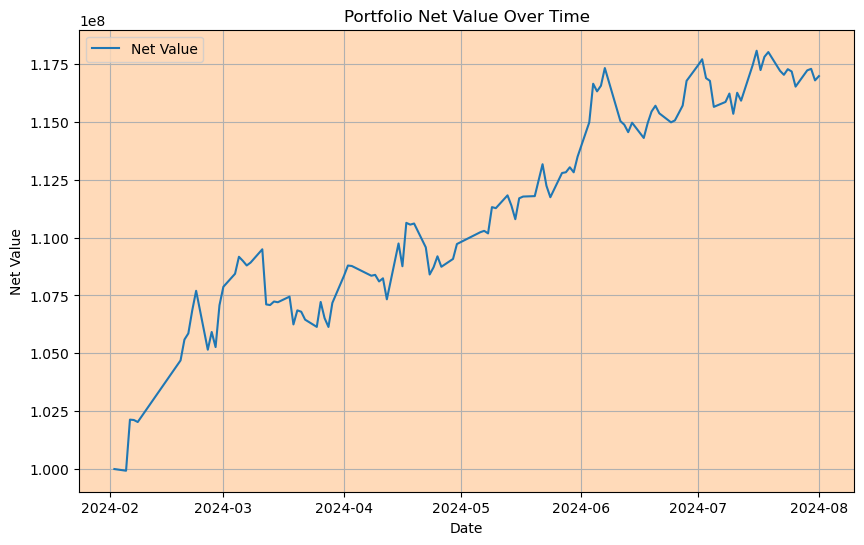

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, portfolio_df['Net_Value'], label='Net Value')
plt.xlabel('Date')
plt.ylabel('Net Value')
plt.title('Portfolio Net Value Over Time')
plt.legend()
plt.grid(True)
plt.show()

Max Drawdown: -3.06%


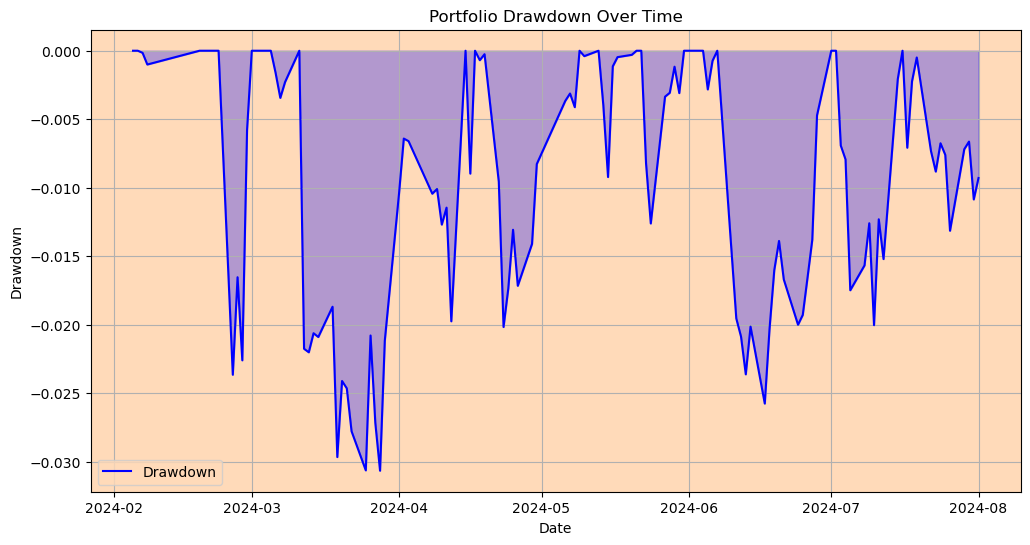

In [26]:
portfolio_df['Daily_Return'] = portfolio_df['Net_Value'].pct_change()

# max draw back
portfolio_df['Cumulative_Return'] = (1 + portfolio_df['Daily_Return']).cumprod()
portfolio_df['Cumulative_Max'] = portfolio_df['Cumulative_Return'].cummax()
portfolio_df['Drawdown'] = portfolio_df['Cumulative_Return'] / portfolio_df['Cumulative_Max'] - 1
max_drawdown = portfolio_df['Drawdown'].min()

print(f"Max Drawdown: {max_drawdown:.2%}")

plt.figure(figsize=(12, 6))
plt.plot(portfolio_df['Date'], portfolio_df['Drawdown'], label='Drawdown', color='blue')
plt.fill_between(portfolio_df['Date'], portfolio_df['Drawdown'], color='blue', alpha=0.3)
plt.title('Portfolio Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
import quantstats as qs
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date']) 
portfolio_df.set_index('Date', inplace=True)
portfolio_df['Daily_Return'] = portfolio_df['Net_Value'].pct_change()

sharpe_ratio = qs.stats.sharpe(portfolio_df['Daily_Return'])
print(f"Sharpe ratio: {sharpe_ratio}")

Sharpe ratio: 2.7973503023283333


                    Strategy
------------------  ----------
Start Period        2024-02-05
End Period          2024-08-01
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   16.98%
CAGR﹪              24.86%

Sharpe              2.81
Prob. Sharpe Ratio  97.16%
Sortino             4.61
Sortino/√2          3.26
Omega               1.64

Max Drawdown        -3.06%
Longest DD Days     32

Gain/Pain Ratio     0.64
Gain/Pain (1M)      -

Payoff Ratio        1.22
Profit Factor       1.64
Common Sense Ratio  2.37
CPC Index           1.14
Tail Ratio          1.45
Outlier Win Ratio   3.64
Outlier Loss Ratio  4.25

MTD                 0.16%
3M                  6.61%
6M                  16.98%
YTD                 16.98%
1Y                  16.98%
3Y (ann.)           24.86%
5Y (ann.)           24.86%
10Y (ann.)          24.86%
All-time (ann.)     24.86%

Avg. Drawdown       -1.32%
Avg. Drawdown Days  10
Recovery Factor     5.23
Ulcer Index         0.01
Serenity Index      3.85


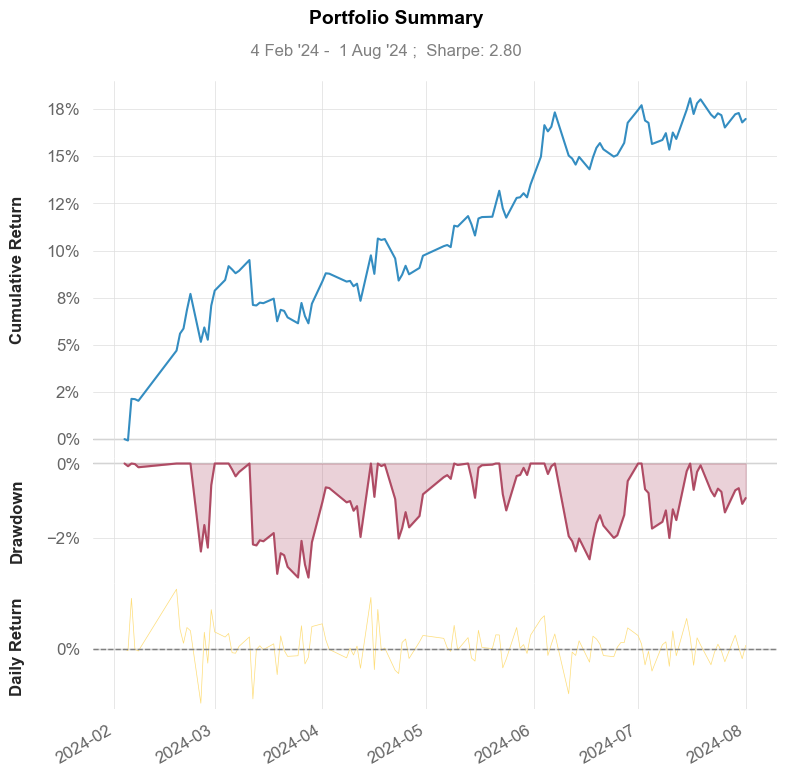

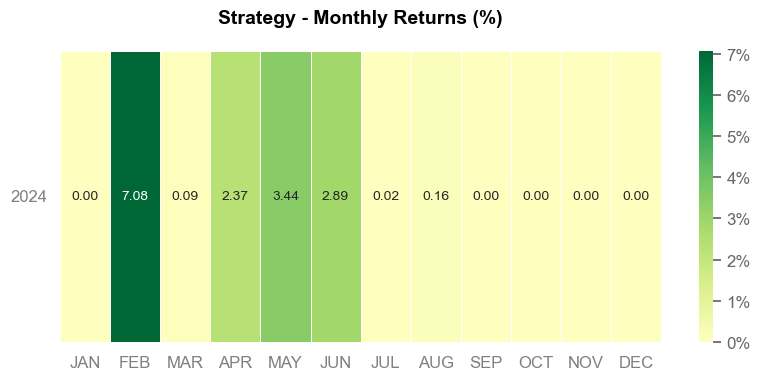

In [28]:
qs.reports.basic(portfolio_df['Daily_Return'])